# 13.0 О чём этот модуль
### О чём этот модуль
Вы уже умеете делать много полезных трюков с данными, представленными в CSV-формате. Наверняка многие из этих трюков вы уже пробовали применить для решения реальных задач, и, скорее всего, это неплохо у вас получилось. Тем не менее нет предела совершенству.

В реальной практике далеко не все данные, которые мы получаем для работы, упакованы в структурированные, готовые к обработке в библиотеке Pandas CSV-файлы. Данные могут поступать к нам в разных форматах: это и таблицы Excel со сложной и не всегда логичной структурой, и загруженные из интернета файлы в формате JSON и XML, которые имеют далеко не табличную структуру.

Для работы с такими данными нужно не только понимать особенности их структуры, но и уметь использовать специальные инструменты: библиотеки, функции и методы. Всем этим мы и займёмся в данном модуле.

### Чему я научусь в этом модуле?
В этом модуле мы будем учиться работать с тремя форматами данных, с которыми, помимо CSV, чаще всего приходится иметь дело аналитику: Excel, JSON и XML. Вы научитесь:

- открывать файлы указанных форматов;
- анализировать структуру данных и разрабатывать план работы с данными в зависимости от их структуры;
- преобразовывать данные из одного формата в другой и создавать Pandas DataFrame на основе данных указанных форматов;
- создавать файлы форматов Excel, JSON и XML.

### Полезные ссылки
В этом модуле мы будем работать с новыми библиотеками, поэтому будет полезным иметь под рукой ссылки на документацию этих библиотек:

Модуль JSON (https://docs.python.org/3/library/json.html) стандартной библиотеки Python.  
Метод read_excel (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) библиотеки Pandas.  
Модуль xml.etree.ElementTree (https://docs.python.org/3.7/library/xml.etree.elementtree.html) стандартной библиотеки Python.

# 13.1 Формат JSON
### Что такое JSON и зачем он нужен?
Аббревиатура JSON расшифровывается как JavaScript Object Notation или, в вольном переводе, система обозначения (или записи) объектов JavaScript. 

Несмотря на то,  что JSON является подмножеством языка программирования JavaScript, сейчас это общепризнанный формат обмена данными, и многие языки программирования, включая Python, содержат эффективные инструменты для работы с этим форматом.

### Важно! JSON — это простой, структурированный, основанный на использовании текста формат обмена данными.

Когда мы говорим об обмене данными, то чаще всего имеем в виду передачу данных по компьютерным сетям, например, пересылку данных от сервера к браузеру. Если вы планируете использовать в своей работе информацию, которая автоматически загружается из каких-либо веб-служб, то умение работать с форматом JSON — это критически важный навык, который обязательно необходимо приобрести. Именно этим мы сейчас и займёмся.

### Инструменты для работы с JSON
Для работы с данными в формате JSON в Python используется библиотека json, которую необходимо будет загрузить в начале работы. Также нам может быть полезен модуль pprint (именно так, с двумя "р" в начале) и встроенная в него функция pprint, с помощью которой можно красиво выводить на экран структурированные данные.

Итак, если в своем коде вы планируете работать с данными в JSON-формате, то необходимо включить в программу эти два импорта:

In [1]:
import json  
from pprint import pprint

# Как выглядит JSON?
Информация в формате JSON представляет собой (в закодированном виде) одну из двух структур:

- набор пар "ключ-значение", причём ключ — это всегда строковая величина; в Python такая структура преобразуется в словарь;
- упорядоченный набор значений; при чтении JSON в Python эта структура будет преобразована в список.

Формат JSON допускает неограниченное количество вложений этих структур друг в друга. Давайте посмотрим, как могут выглядеть эти структуры. 

Все упражнения раздела мы будем выполнять на примере файла, содержащего информацию об ингредиентах блюд, относящихся к кухням разных народов. Мы будем работать с сокращенной версией файла, скачать которую можно здесь (https://lms.skillfactory.ru/assets/courseware/v1/92fd198fd3eccc09a8c3498e9dd25588/asset-v1:Skillfactory+DST-WEEKLY-2.0+08JULY2020+type@asset+block/recipes.json). Полный датасет, содержащий более 30 000 видов блюд, можно скачать здесь (https://www.kaggle.com/c/whats-cooking/data) (требуется регистрация). 

### Смотрим на данные
Чтобы перевести данные из формата JSON в формат, который можно обрабатывать на Python, необходимо выполнить процедуру, которая называется десериализация (иными словами, декодирование данных). Обратный процесс, связанный с переводом структур данных Python в формат JSON, называется сериализация.

Для выполнения десериализации мы воспользуемся методом load модуля json. В качестве параметра укажем ссылку на файл:

In [3]:
with open('recipes.json') as f:
    recipes = json.load(f)

Чтобы разобраться в структуре данных, давайте выведем их на экран с помощью функции pprint. Будьте готовы к тому, что данных в наборе много, поэтому в ячейке Out появится несколько сот строк. Нам не нужно будет просматривать все строки. Главное — понять общую структуру объекта recipes:

In [4]:
pprint(recipes)

[{'cuisine': 'greek',
  'id': 10259,
  'ingredients': ['romaine lettuce',
                  'black olives',
                  'grape tomatoes',
                  'garlic',
                  'pepper',
                  'purple onion',
                  'seasoning',
                  'garbanzo beans',
                  'feta cheese crumbles']},
 {'cuisine': 'southern_us',
  'id': 25693,
  'ingredients': ['plain flour',
                  'ground pepper',
                  'salt',
                  'tomatoes',
                  'ground black pepper',
                  'thyme',
                  'eggs',
                  'green tomatoes',
                  'yellow corn meal',
                  'milk',
                  'vegetable oil']},
 {'cuisine': 'filipino',
  'id': 20130,
  'ingredients': ['eggs',
                  'pepper',
                  'salt',
                  'mayonaise',
                  'cooking oil',
                  'green chilies',
                  'grilled chicken bre

                  'okra pods',
                  'yellow bell pepper',
                  'chopped cilantro fresh']},
 {'cuisine': 'chinese',
  'id': 44812,
  'ingredients': ['water',
                  'salt',
                  'garlic cloves',
                  'cold water',
                  'orange',
                  'sauce',
                  'onions',
                  'soy sauce',
                  'star anise',
                  'chinese five-spice powder',
                  'brown sugar',
                  'fresh ginger',
                  'duck']},
 {'cuisine': 'moroccan',
  'id': 27858,
  'ingredients': ['tomato paste',
                  'unsalted butter',
                  'dried mint flakes',
                  'purple onion',
                  'ground cumin',
                  'olive oil',
                  'grated parmesan cheese',
                  'diced tomatoes',
                  'penne rigate',
                  'feta cheese',
                  'whole milk',
        

  'ingredients': ['chopped celery',
                  'fire roasted diced tomatoes',
                  'andouille sausage',
                  'sweet pepper',
                  'red kidnei beans, rins and drain']},
 {'cuisine': 'japanese',
  'id': 1355,
  'ingredients': ['gari',
                  'rice vinegar',
                  'wasabi paste',
                  'black sesame seeds',
                  'scallions',
                  'Japanese soy sauce',
                  'fresh salmon',
                  'sugar',
                  'ginger',
                  'garlic cloves']},
 {'cuisine': 'italian',
  'id': 40738,
  'ingredients': ['dried porcini mushrooms',
                  'chopped fresh thyme',
                  'beef rib short',
                  'tomato paste',
                  'kosher salt',
                  'dry red wine',
                  'hot water',
                  'black pepper',
                  'fat free less sodium beef broth',
                  'garlic cloves',
 

                  'fresh lime',
                  'salsa']},
 {'cuisine': 'chinese',
  'id': 3605,
  'ingredients': ['honey',
                  'ginger',
                  'whiskey',
                  'chicken wings',
                  'green onions',
                  'green chilies',
                  'hoisin sauce',
                  'garlic',
                  'soy sauce',
                  'sesame oil',
                  'chinese five-spice powder']},
 {'cuisine': 'cajun_creole',
  'id': 41363,
  'ingredients': ['chicken stock',
                  'kosher salt',
                  'unsalted butter',
                  'scallions',
                  'canola oil',
                  'andouille sausage',
                  'dried thyme',
                  'yellow onion',
                  'celery',
                  'green bell pepper',
                  'dried basil',
                  'flour',
                  'ground white pepper',
                  'boneless chicken skinless thigh',


  'ingredients': ['light soy sauce',
                  'dark sesame oil',
                  'cilantro leaves',
                  'honey',
                  'fresh lime juice',
                  'creamy peanut butter']},
 {'cuisine': 'mexican',
  'id': 47623,
  'ingredients': ['green onions',
                  'garlic',
                  'sour cream',
                  'lime juice',
                  'cooked chicken',
                  'shredded sharp cheddar cheese',
                  'chopped cilantro',
                  'flour tortillas',
                  'chili powder',
                  'salsa',
                  'cumin',
                  'cooking spray',
                  'onion powder',
                  'cream cheese, soften']},
 {'cuisine': 'mexican',
  'id': 26464,
  'ingredients': ['coconut sugar',
                  'lime juice',
                  'sea salt',
                  'ground cumin',
                  'coconut oil',
                  'cayenne',
                  'h

                  'vegetable oil',
                  'chopped cilantro fresh',
                  'soy sauce',
                  'unsalted roasted peanuts',
                  'garlic',
                  'wide rice noodles',
                  'water',
                  'radishes',
                  'beansprouts']},
 {'cuisine': 'mexican',
  'id': 27204,
  'ingredients': ['canned black beans',
                  'bell pepper',
                  'diced tomatoes',
                  'long-grain rice',
                  'diced onions',
                  'lime',
                  'spices',
                  'salt',
                  'canned corn',
                  'lettuce',
                  'water',
                  'boneless skinless chicken breasts',
                  'cilantro',
                  'sour cream',
                  'tomato paste',
                  'olive oil',
                  'butter',
                  'scallions']},
 {'cuisine': 'italian',
  'id': 8304,
  'ingredients':

Итак, мы видим, что рецепт каждого блюда описан в виде словаря, состоящего из трёх пар "ключ-значение". Ключ "cuisine" обозначает принадлежность блюда к определённой кухне, "id" — это уникальный идентификационный номер блюда, а ключ "ingredients" содержит перечень продуктов, входящих в состав блюда.

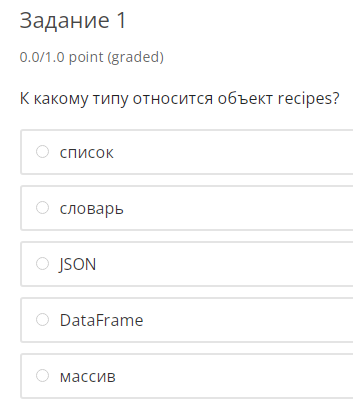

In [6]:
print(type(recipes))

<class 'list'>


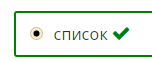

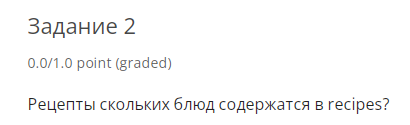

In [7]:
print(len(recipes))

500


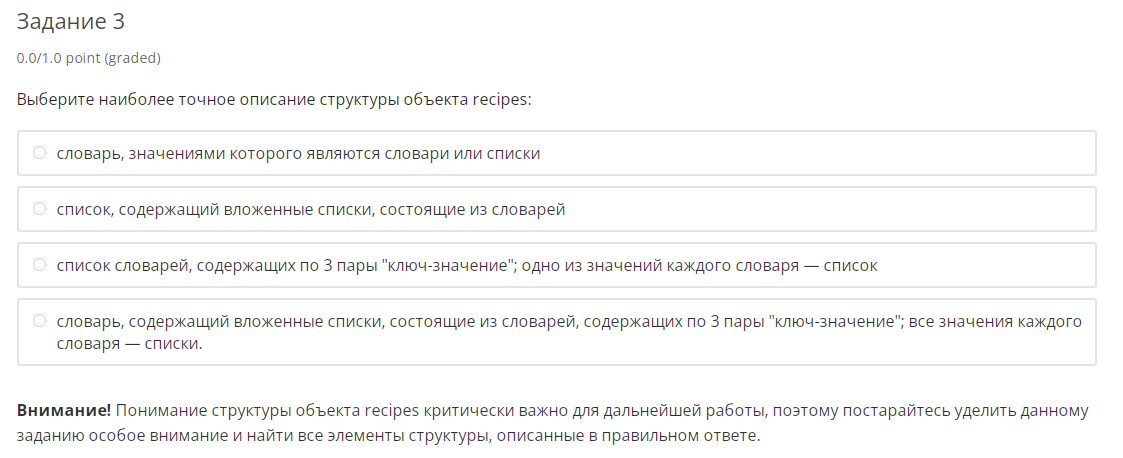

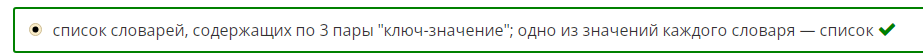

# 13.2 Извлекаем данные из JSON
### Извлекаем единичные данные
После того как мы провели десериализацию данных из JSON-файла, мы можем работать с полученным объектом, как с обычным словарём, или, как в случае с нашими данными, списком. Единственное отличие этой работы от манипуляций с привычными нам списками и словарями заключается в том, что данных теперь больше и они помещены внутрь структуры с большим количеством уровней вложенности. Тем не менее общие приёмы работы остаются стандартными.

Давайте выясним некоторые детали о блюде, которое записано первым в списке. Например, чтобы узнать ID этого блюда, мы можем использовать такой код:

In [8]:
recipes[0]['id']

10259

В данном случае сначала мы извлекаем из списка первый элемент (индекс 0). Поскольку каждый элемент списка является словарём, для получения нужной информации о конкретном блюде нам нужно указать ключ словаря. ID блюда доступно по ключу 'id', и мы указываем этот ключ в отдельной паре квадратных скобок:
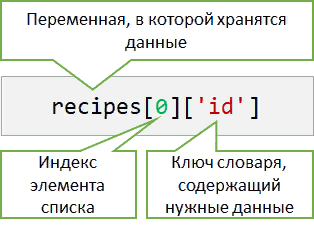

Для получения списка ингредиентов первого блюда в списке мы можем использовать тот же код, заменив в нём ключ 'id' на 'ingredients':

In [9]:
recipes[0]['ingredients']

['romaine lettuce',
 'black olives',
 'grape tomatoes',
 'garlic',
 'pepper',
 'purple onion',
 'seasoning',
 'garbanzo beans',
 'feta cheese crumbles']

Ещё один пример касается извлечения информации о конкретном блюде. Давайте попробуем найти информацию о том, к какой кухне относится блюдо с id = 13121. Сложность задачи заключается в том, что все id хранятся в словарях, которые являются элементами списка. Для получения данных о нужном блюде нам придётся перебрать все элементы списка, проверить их id, и при обнаружении совпадения извлечь нужную информацию:

In [10]:
for recipe in recipes:  # начинаем перебор всех рецептов
    if recipe['id'] == 13121:  # если id текущего рецепта равен искомому
        print(recipe['cuisine'])  # выводим на экран кухню, к которой относится блюдо
        break   # и прерываем цикл, т.к. нужное блюдо уже найдено

thai


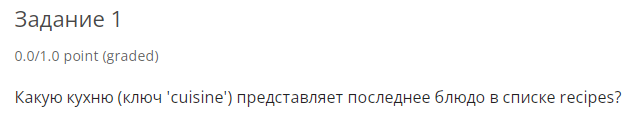

In [13]:
print(recipes[-1]['cuisine'])

british


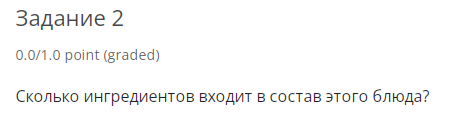

In [14]:
print(len(recipes[-1]['ingredients']))

17


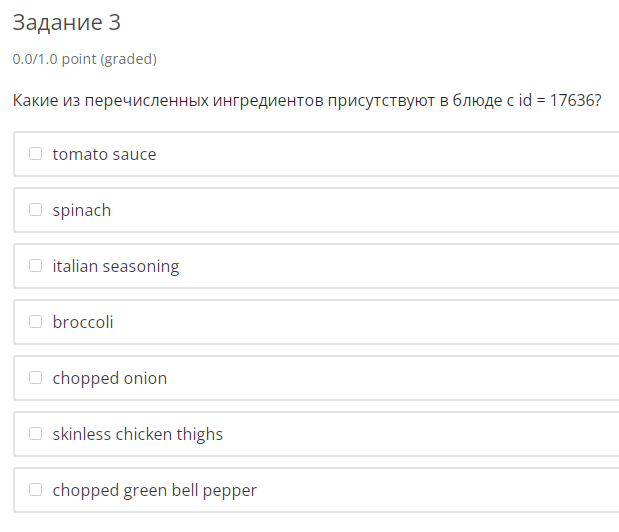

In [25]:
for recipe in recipes:  # начинаем перебор всех рецептов
    if recipe['id'] ==  17636:  # если id текущего рецепта равен искомому
        lst = recipe['ingredients']  # выводим на экран кухню, к которой относится блюдо
        break   # и прерываем цикл, т.к. нужное блюдо уже найдено
for l in ['tomato sauce', 'spinach', 'italian seasoning', 'broccoli', 'chopped onion', 
          'skinless chicken thighs', 'chopped green bell pepper']:
    if l in lst:
        print(l)

tomato sauce
spinach
italian seasoning
chopped onion
chopped green bell pepper


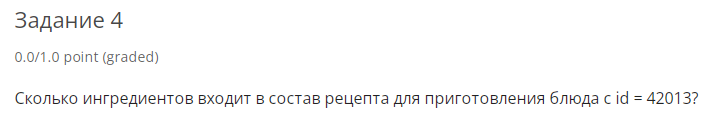

In [27]:
for recipe in recipes:  # начинаем перебор всех рецептов
    if recipe['id'] ==  42013:  # если id текущего рецепта равен искомому
        print(len(recipe['ingredients']))  # выводим на экран кухню, к которой относится блюдо
        break   # и прерываем цикл, т.к. нужное блюдо уже найдено

14


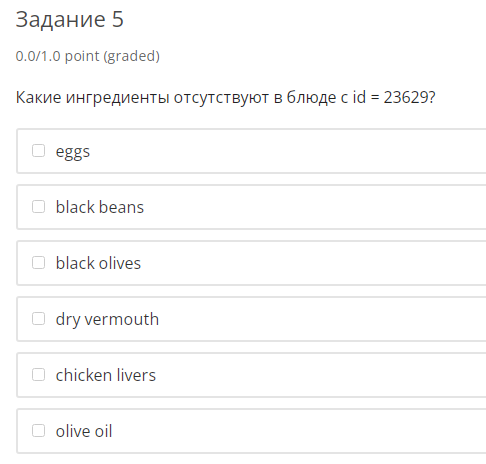

In [23]:
for recipe in recipes:  # начинаем перебор всех рецептов
    if recipe['id'] ==  23629:  # если id текущего рецепта равен искомому
        lst = recipe['ingredients']  # выводим на экран кухню, к которой относится блюдо
        break   # и прерываем цикл, т.к. нужное блюдо уже найдено
for l in ['eggs', 'black beans', 'black olives', 'dry vermouth', 'chicken livers', 'olive oil']:
    if l not in lst:
        print(l)

dry vermouth
chicken livers
olive oil


# 13.3 Группировка данных
### Группируем данные
К объектам JSON, в том числе после их десериализации, невозможно применить методы группировки, доступные при работе с датафреймами Pandas. Однако задачи по извлечению из JSON-файла обобщённой информации периодически возникают, и нам нужно понять, как их решать. Давайте рассмотрим всё на нескольких примерах.

### Кейс №1: Какое количество кухонь представлено в наборе данных?
Итак, давайте попробуем проанализировать, кухни скольких народов мира присутствуют в нашем наборе данных. Напоминаем, что информация о типе кухни доступна по ключу 'cuisine'.

Чтобы извлечь эту информацию, нам нужно создать пустой список и последовательно заполнять его уникальными значениями, доступными по ключу 'cuisine' в каждом из словарей, содержащих информацию о рецептах. Поскольку словари объединены в список recipes, у нас не получится применить известный нам метод unique() (этот метод не применим к словарям), и для извлечения всех уникальных значений нужно перебирать элементы списка в цикле с параметром. Вот пример кода, с помощью которого это можно сделать:

In [30]:
cuisines = []  # создаём пустой список для хранения уникальных значений кухонь
for recipe in recipes:  # начинаем перебор всех рецептов
    if not(recipe['cuisine'] in cuisines):  # если тип кухни текущего блюда ещё не встречался
        cuisines.append(recipe['cuisine']) # добавляем его к списку cuisines
len(cuisines)

20

Другой способ решения этой же задачи — использование для хранения данных о разных кухнях не списка, а новой для вас конструкции — множества (set)(https://python-scripts.com/sets). Множества содержат только уникальные элементы, поэтому при работе с ним нет необходимости проверять, содержится ли там тот или иной элемент. Если элемент (в нашем примере — название типа кухни) уже есть, то команда добавить в множество такое же значение будет проигнорирована компьютером:

In [29]:
cuisines = set()  # создаём пустое множество для хранения уникальных значений кухонь
for recipe in recipes:  # начинаем перебор всех рецептов
    cuisines.add(recipe['cuisine']) # добавляем название типа кухни к множеству
len(cuisines)

20

# Задание 1
Сколько ингредиентов включено в состав всех блюд, описанных в наборе данных?  
Подсказка: Обратите внимание, что для добавления в список или множество нового ингредиента вам нужно будет организовать перебор ингредиентов каждого блюда в отдельном вложенном цикле.

In [43]:
ingredients = set()  # создаём пустое множество для хранения уникальных значений кухонь
for recipe in recipes:  # начинаем перебор всех рецептов
    for ingredient in recipe['ingredients']:
        ingredients.add(ingredient)  # добавляем название типа кухни к множеству
len(ingredients)

1318

# Задание 2
Сколько ингредиентов встречается в рецептах блюд итальянской кухни ('cuisine' = italian)?

In [44]:
ingredients = set()  # создаём пустое множество для хранения уникальных значений кухонь
for recipe in recipes:  # начинаем перебор всех рецептов
    if recipe['cuisine'] == 'italian':
        for ingredient in recipe['ingredients']:
            ingredients.add(ingredient)  # добавляем название типа кухни к множеству
len(ingredients)

406

# Задание 3
Какие ингредиенты не встречаются в рецептах блюд русской кухни ('cuisine' = 'russian')?
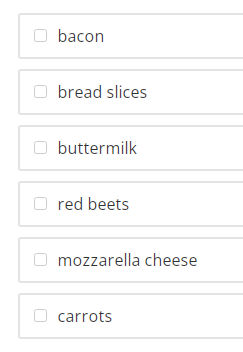

In [46]:
ingredients = set()  # создаём пустое множество для хранения уникальных значений кухонь
for recipe in recipes:  # начинаем перебор всех рецептов
    if recipe['cuisine'] == 'russian':
        for ingredient in recipe['ingredients']:
            ingredients.add(ingredient)  # добавляем название типа кухни к множеству
for i in ['bacon', 'bread' 'slices', 'buttermilk', 'red beets', 'mozzarella cheese', 'carrots']:
    if i not in ingredients:
        print(i)

bacon
breadslices
carrots


### Кейс №2: Оцениваем популярность ингредиентов
Давайте представим, что мы хотим заняться торговлей продуктами для ресторанов национальной кухни. Нам необходимо оценить, какие продукты используются в приготовлении блюд чаще, а какие — реже. Давайте попробуем решить эту задачу с использованием имеющегося у нас набора данных.

### Эту задачу можно решить двумя способами:

1. Преобразовать JSON-структуру в датафрейм и найти количество ненулевых значений для каждого ингредиента. Этот способ мы подробнее рассмотрим в следующем шаге.
2. Создать словарь, в котором ключами будут являться названия ингредиентов, а значениями — количество рецептов, в которых встречается каждый ингредиент. Этот способ мы рассмотрим прямо сейчас.

Для создания словаря нам понадобится список или множество, содержащие перечень всех ингредиентов из описанных в наборе данных рецептов. Такой список вы составили при решении задачи в предыдущем уроке. Воспользуйтесь вашим кодом для решения этой задачи ещё раз, но при этом назовите список (или множество, это не будет иметь значения в коде, который мы собираемся создавать) именем ingredients.

### План решения задачи:
1. Для хранения информации о частоте встречаемости ингредиентов мы создадим пустой словарь food.
2. Заполним словарь food ключами, соответствующими названиями ингредиентов. В качестве значений по каждому ключу установим 0.
3. Организуем вложенный цикл, в котором будем перебирать рецепты (внешний цикл) и ингредиенты, использующиеся в каждом рецепте (внутренний цикл). При каждом появлении очередного ингредиента мы будем увеличивать значение соответствующего элемента словаря food на единицу.

Вот как будут выглядеть те же действия в виде кода на Python:

In [47]:
ingredients = set()  # создаём пустое множество для хранения уникальных значений кухонь
for recipe in recipes:  # начинаем перебор всех рецептов
    for ingredient in recipe['ingredients']:
        ingredients.add(ingredient)  # добавляем название типа кухни к множеству

food = {}  # создаём пустой словарь для хранения информации об ингредиентах
for item in ingredients:  # перебираем список ингредиентов
    food[item] = 0 # добавляем в словарь ключ, соответствующий очередному ингредиенту
for recipe in recipes:   # перебираем список рецептов
    for item in recipe['ingredients']:   # и список ингредиентов в каждом рецепте
        food[item] += 1   # увеличиваем значение нужного ключа в словаре на 1

Теперь мы можем обращаться к словарю food по ключам и получать информацию о количестве рецептов, включающих тот или иной ингредиент:

In [50]:
print(food['sugar'])

print(food['eggs'])

81
43


# Задание 4
Какие ингредиенты входят в состав более чем 20% блюд, представленных в наборе данных?

Подсказка: Напоминаем, что весь набор данных содержит сведения о 500 блюдах.
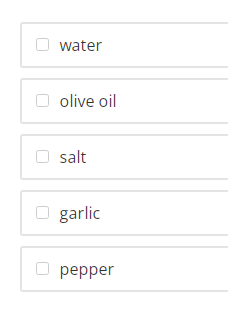

In [54]:
for index, value in food.items():
    if value > 100:
        print(index, value)

garlic 107
salt 217


# Задание 5
Какой ингредиент чаще всего встречается в составе блюд?

In [53]:
max_count = ['', 0]
for i in food:
    if food[i] > max_count[1]:
        max_count = [i, food[i]]
print(max_count)

['salt', 217]


# Задание 6
Сколько ингредиентов входит в состав только одного блюда?

# 13.4 Создание датафрейма на основе JSON-файла
### Pandas + JSON = ...
В предыдущих блоках нам удавалось извлекать из набора данных единичные показатели, но для полноценного анализа данных этого часто бывает недостаточно. Для решения многих задач нужна возможность работать с данными в форме таблицы и обозревать всю таблицу целиком. Например, набор данных, с фрагментом которого мы работаем в этом разделе модуля,  —  это материал для задачи по машинному обучению, определяющий по набору ингредиентов  тип кухни, к которой относится рецепт. Для решения этой и подобных задач необходимо перевести данные и в табличную форму и удобнее всего  использовать библиотеку Pandas.

Как вы помните, после десериализации наши данные были преобразованы в список, элементами которого являются вложенные словари, содержащие по три пары "ключ-значение". Поскольку структура всех вложенных словарей одинакова, мы можем создать датафрейм на основе списка, не проводя с ним никаких дополнительных манипуляций:

In [55]:
import pandas as pd
df = pd.DataFrame(recipes)

В результате мы действительно получаем датафрейм, однако его структура не позволит нам осуществлять группировку данных и выполнять многие другие операции, связанные с исследованием ингредиентов разных блюд:
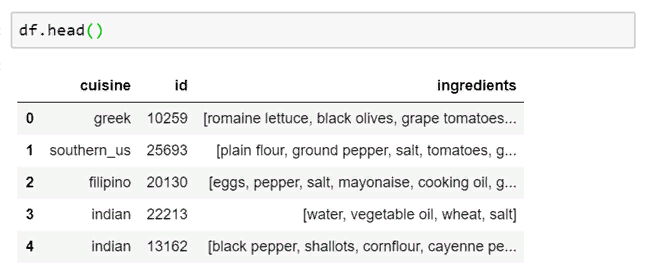
Для полноценной работы с данными нам необходимо иметь возможность хранить информацию о каждом ингредиенте в отдельном столбце. Созданием именно такой таблицы мы займёмся на следующем шаге.

# Задание 1
Какая часть набора данных была использована в качестве заголовков столбцов при создании датафрейма с помощью команды df = pd.DataFrame(recipes)?
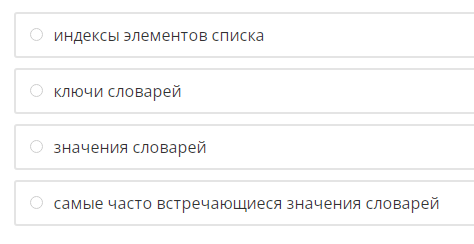

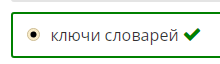

# Задание 2
Какая часть набора данных была использована в качестве индексов строк при создании датафрейма с помощью команды df = pd.DataFrame(recipes)?
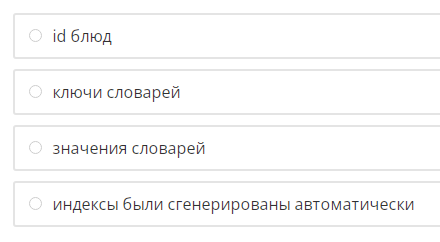

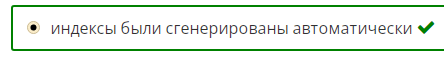

Готовим данные для анализа
Давайте создадим на основе данных из JSON-файла датафрейм, пригодный для автоматизированного анализа данных. В качестве основы мы будем использовать датафрейм, созданный на предыдущем этапе. 

Прежде всего разберёмся со структурой нового датафрейма. В финальной версии в нашем датафрейме должны будут остаться столбцы, содержащие id блюда и название кухни; вместо списка ингредиентов мы включим в датафрейм столбец с данными о количестве ингредиентов, а оставшаяся часть датафрейма будет представлена столбцами, названия которых будут соответствовать названиям разных ингредиентов, а значения будут равны 1, если ингредиент присутствует в блюде, и 0,  если — отсутствует.

Общий вид датафрейма должен быть приблизительно следующим (возможен другой порядок столбцов с ингредиентами):

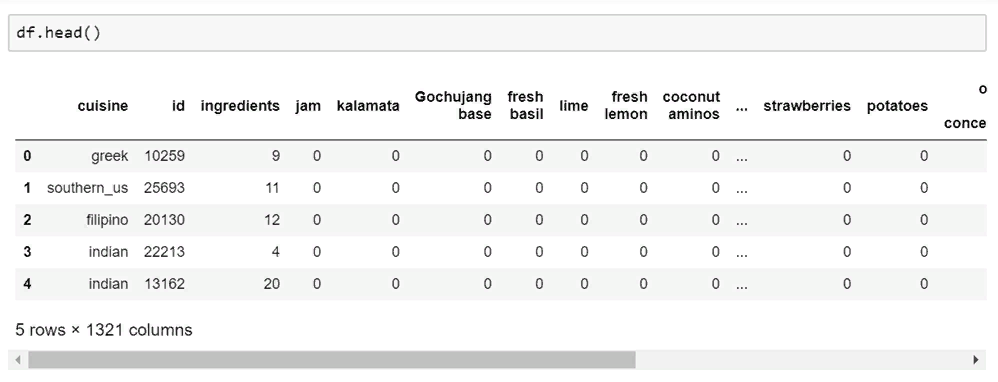

Работу над созданием датафрейма мы начнём с создания и заполнения столбцов, содержащих сведения о наличии или отсутствии каждого ингредиента в рецепте. Процесс заполнения  будем проводить в два этапа: 

1. Создадим функцию для заполнения значения в каждой ячейке. Функция будет проверять наличие конкретного ингредиента в столбце 'ingredients' для текущего блюда и возвращать 1, если ингредиент есть в рецепте, и 0, если он отсутствует.
2. Организуем цикл с параметром, в котором будем перебирать наименования всех ингредиентов. Для каждого ингредиента создадим в датафрейме столбец с соответствующим названием и заполним его единичками и нулями, применив к датафрейму, а точнее, к столбцу 'ingredients', функцию, созданную нами на предыдущем шаге.

Код функции, с помощью которой мы будем создавать новые столбцы и заполнять их значениями, могут выглядеть следующим образом:

In [56]:
def find_item(cell):
    if item in cell:
        return 1
    return 0

Теперь перейдём к созданию кода, в котором будут создаваться столбцы с информацией о наличии или отсутствии того или иного ингредиента в конкретном рецепте:

In [57]:
for item in ingredients:
    df[item] = df['ingredients'].apply(find_item)

В завершение изменим значение столбца ingredients, заполнив его данными о количестве ингредиентов в каждом рецепте:

In [58]:
df['ingredients'] = df['ingredients'].apply(len)

# Задание 3
Определите тип переменной cell, которую принимает на входе функция find_item:
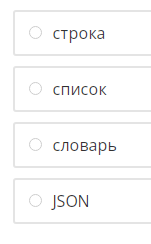

# Задание 4
Отметьте верные утверждения о переменной item, которая используется в коде функции find_item:
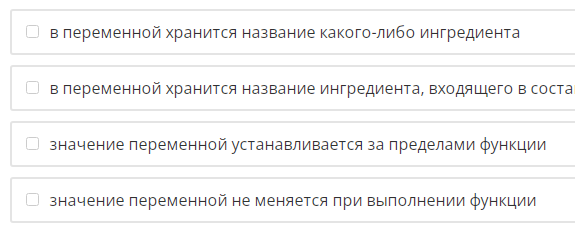

# Задание 5
Причина, по которой мы сначала заполнили столбцы с данными о наличии или отсутствии каждого ингредиента, а после этого заполнили столбец данными о количестве ингредиентов в рецепте:
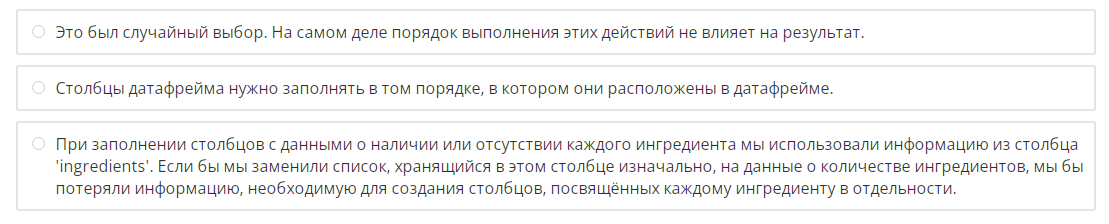

# Задание 6
Объедините все действия, начиная с чтения файла в JSON-формате (recipes.json) и заканчивая созданием итогового датафрейма, в единый код. Загрузите весь код в поле для ответа. Импорт библиотек в поле для ответа загружать не нужно.

Используйте множество (set) для хранения названий ингредиентов блюд.

Полученный в результате работы кода датафрейм должен иметь имя df.